#### This code generates large dataframe containing multiple timeseries

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

#### parameters to set

In [9]:
n_series = 6
n_timesteps = 8*24*3600 # 8 days

# regular behaviour
max_noise_amplitude = 0.05 # all the timeseries will have values between 0 and 1

# anomalies
p_anomaly = 10E-6
max_anomaly_duration = 4*3600 # 4 h

#### generate normal data

In [10]:
df = pd.DataFrame()
for s in range(n_series):
    v = np.random.normal(random.random()/2, max_noise_amplitude/random.randint(1, 8), n_timesteps)
    df[s]=pd.Series(v)
df['Flag']=False
#df.head()

#### generate anomalies

In [11]:
to_generate = int(n_timesteps * p_anomaly)
for a in range(to_generate):
    affects = random.sample(range(n_series), random.randint(1, n_series))
    duration = int(max_anomaly_duration * random.random())
    start = (n_timesteps * random.random())
    end = min(start+duration, n_timesteps)
    for s in affects:
        df.loc[start:end,s] = df.loc[start:end,s] + random.random() * 0.3
    if len(affects)>1:
        df.loc[start:end,"Flag"]=True
        

#### enforce range

In [12]:
df[df<0] = 0
df[df>1] = 1

#### plot timeseries

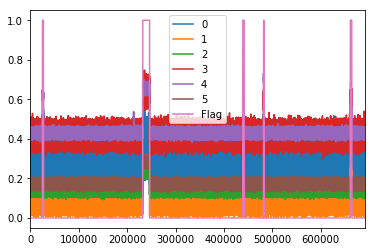

In [13]:
df.plot()

#### running BDT

In [14]:
clf = AdaBoostClassifier() #n_estimators=100)

# loop over data split in one hour intervals
steps = int(n_timesteps/3600)
for s in range(steps-1):
    X = df.loc[ s * steps : (s + 2) * steps-1, range(n_series)]
    y = pd.DataFrame(0, index=np.arange(2 * steps), columns=['y'])
    y[steps:]=1  # lebel second interval with 1
    scores = cross_val_score(clf, X, y['y'])
    print("step:",s, "\tresult:", scores.mean()) #, clf.feature_importances_)

step: 0 	result: 0.528645833333
step: 1 	result: 0.4921875
step: 2 	result: 0.494791666667
step: 3 	result: 0.5
step: 4 	result: 0.494791666667
step: 5 	result: 0.528645833333
step: 6 	result: 0.515625
step: 7 	result: 0.546875
step: 8 	result: 0.479166666667
step: 9 	result: 0.427083333333
step: 10 	result: 0.502604166667
step: 11 	result: 0.432291666667
step: 12 	result: 0.513020833333
step: 13 	result: 0.5234375
step: 14 	result: 0.481770833333
step: 15 	result: 0.549479166667
step: 16 	result: 0.458333333333
step: 17 	result: 0.481770833333
step: 18 	result: 0.502604166667
step: 19 	result: 0.494791666667
step: 20 	result: 0.526041666667
step: 21 	result: 0.526041666667
step: 22 	result: 0.502604166667
step: 23 	result: 0.4921875
step: 24 	result: 0.481770833333
step: 25 	result: 0.46875
step: 26 	result: 0.4921875
step: 27 	result: 0.471354166667
step: 28 	result: 0.497395833333
step: 29 	result: 0.440104166667
step: 30 	result: 0.53125
step: 31 	result: 0.473958333333
step: 32 	r